<a href="https://colab.research.google.com/github/acesaran/MAT-421/blob/main/ModuleB_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 17.4 - Lagrange Polynomial Interpolation

Lagrange polynomial interpolation is a form of interpolation that finds a single polynomial that goes through all of the data points given. It is a linear combination of Lagrange basis polynomials.

In [5]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

plt.style.use('seaborn-poster')

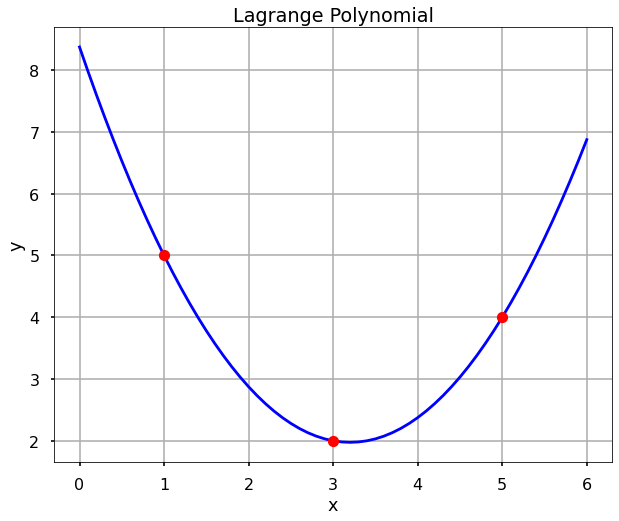

In [17]:
x = [1, 3, 5]
y = [5, 2, 4]

x_new = np.arange(0, 6.1, .1)

L = lagrange(x, y)

fig = plt.figure(figsize = (10,8))
plt.plot(x_new, L(x_new), 'b', x, y, 'ro')
plt.title('Lagrange Polynomial')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 17.5 - Newton's Polynomial Interpolation

Another form of interpolation is Newton's polynomial interpolation. It uses an n-1 order polynomial through n points given.

In [7]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

In [8]:
def divided_diff(x, y):
  
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])
            
    return coef

def newton_poly(coef, x_data, x):
  
    n = len(x_data) - 1 
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

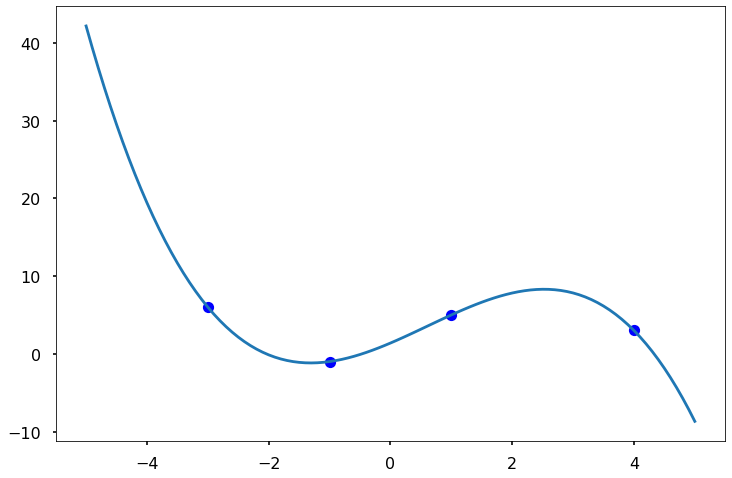

In [21]:
x = np.array([-3, -1, 1, 4])
y = np.array([6, -1, 5, 3])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(-5, 4.1, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)